In [1]:
# EDA를 위한 패키지들
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
plt.rc('font', family='AppleGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False) # False로 해야 - 부호가 안깨짐

In [3]:
train_data = pd.read_csv("./data/train.csv")
train_data

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3


In [4]:
test_data = pd.read_csv("./data/test.csv")
test_data

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차
...,...,...,...,...,...,...,...,...
10958,ACCIDENT_50567,2022-12-31 18,토요일,맑음,대구광역시 남구 대명동,단일로 - 터널,건조,차대차
10959,ACCIDENT_50568,2022-12-31 18,토요일,맑음,대구광역시 수성구 시지동,단일로 - 기타,건조,차대차
10960,ACCIDENT_50569,2022-12-31 20,토요일,맑음,대구광역시 수성구 연호동,단일로 - 기타,건조,차대차
10961,ACCIDENT_50570,2022-12-31 20,토요일,맑음,대구광역시 수성구 범물동,교차로 - 교차로부근,건조,차대차


In [5]:
def wrangiling(data_set):
    print("==================")
    print("       Shape      ")
    print("==================")

    display(data_set.shape)

    print("==================")
    print("        Info      ")
    print("==================")

    display(data_set.info())

    print("==================")
    print("      Columns     ")
    print("==================")
    
    display(data_set.columns)

    print("==================")
    print("        NaN       ")
    print("==================")

    display(data_set.isna().sum())

    print("==================")
    print("     Duplicated   ")
    print("==================")
    
    display(data_set[data_set.duplicated()])

    print("==================")
    print("    Description   ")
    print("==================")

    display(data_set.describe())

    print("==================")
    print("      Unique      ")
    print("==================")

    display(data_set.nunique())

### == Train Data ==

- Shape
  - Data_num = 39609
  - Column_num = 23
- Info : object(18) and int64(5) Dtypes
- Columns
  - 'ID':
  - '사고일시':
  - '요일':
  - '기상상태': array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)
  - '시군구':
  - '도로형태': array(['단일로 - 기타', '교차로 - 교차로안', '기타 - 기타', '단일로 - 터널', '단일로 - 지하차도(도로)내',
       '단일로 - 교량', '교차로 - 교차로횡단보도내', '주차장 - 주차장', '교차로 - 교차로부근',
       '단일로 - 고가도로위', '미분류 - 미분류'], dtype=object)
  - '노면상태': array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)
  - '사고유형': array(['차대사람', '차대차', '차량단독'], dtype=object)
  - '사고유형 - 세부분류': array(['길가장자리구역통행중', '보도통행중', '차도통행중', '추돌', '측면충돌', '기타', '공작물충돌', '횡단중',
       '정면충돌', '후진중충돌', '전도전복 - 전도', '도로외이탈 - 추락', '도로외이탈 - 기타',
       '전도전복 - 전복'], dtype=object)
  - '법규위반': array(['안전운전불이행', '기타', '교차로운행방법위반', '신호위반', '중앙선침범', '안전거리미확보', '차로위반',
       '보행자보호의무위반', '직진우회전진행방해', '과속', '불법유턴'], dtype=object)
  - '가해운전자 차종': array(['승용', '승합', '기타불명', '화물', '이륜', '특수', '자전거', '원동기', '건설기계',
       '사륜오토바이(ATV)', '개인형이동수단(PM)', '농기계'], dtype=object)
  - '가해운전자 성별': array(['여', '남', '기타불명'], dtype=object)
  - '가해운전자 연령':
  - '가해운전자 상해정도': array(['상해없음', '경상', '기타불명', '중상', '부상신고', '사망'], dtype=object)
  - '피해운전자 차종': array(['보행자', '승용', '자전거', '승합', nan, '이륜', '화물', '개인형이동수단(PM)',
       '사륜오토바이(ATV)', '특수', '원동기', '기타불명', '건설기계', '농기계'], dtype=object)
  - '피해운전자 성별': array(['여', '남', nan, '기타불명'], dtype=object)
  - '피해운전자 연령':
  - '피해운전자 상해정도': array(['상해없음', '경상', '기타불명', '중상', '부상신고', '사망'], dtype=object)
  - '사망자수':
  - '중상자수':
  - '경상자수':
  - '부상자수':
  - 'ECLO'(예측 값): (Equivalent Casualty Loss Only), **ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1**, 본 대회에서는 사고의 위험도를 인명피해 심각도로 측정
- Duplication: 없음
- NaN : 왜 비었을까? 단순히 데이터의 소실? 아니면 사망자 여부? 아니면 데이터 비공개 처리?
  - 피해운전자 차종: 991
  - 피해운전자 성별: 991
  - 피해운전자 연령: 991
  - 피해운전자 상해정도: 991
- Description: 이하 참고
- Unique: 전체데이터 수에 비해 겹치는 값들이 많음, 사고 일시는 거의 절반이 겹침 각각의 사고가 발생한 것인지 한 사고에서 여러데이터가 나온것인지 확인 필요, 성별은 왜 3개인지 확인 필요, 사고유형, 사고유형-세부분류 확인 필요, 법규위반 확인 필요

In [6]:
wrangiling(data_set=train_data)


       Shape      


(39609, 23)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수  

None

      Columns     


Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

        NaN       


ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

     Duplicated   


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO


    Description   


,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


      Unique      


ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

### == Test Data ==

- Shape
  - Data_num = 10963
  - Column_num = 8
- Info : object(18) and int64(5) Dtypes
- Columns
  - 'ID':
  - '사고일시':
  - '요일':
  - '기상상태': array(['맑음', '흐림', '기타', '비', '눈'], dtype=object)
  - '시군구':
  - '도로형태': array(['교차로 - 교차로안', '단일로 - 기타', '교차로 - 교차로횡단보도내', '교차로 - 교차로부근',
       '단일로 - 지하차도(도로)내', '기타 - 기타', '단일로 - 교량', '단일로 - 고가도로위',
       '주차장 - 주차장', '단일로 - 터널', '미분류 - 미분류'], dtype=object)
  - '노면상태': array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)
  - '사고유형': array(['차대사람', '차대차', '차량단독'], dtype=object)
- Duplication: 없음
- NaN : 없음
- Description: 이하 참고
- Unique: 전체데이터 수에 비해 겹치는 값들이 많음, 사고 일시는 거의 절반이 겹침 각각의 사고가 발생한 것인지 한 사고에서 여러데이터가 나온것인지 확인 필요

In [7]:
wrangiling(data_set=test_data)

       Shape      


(10963, 8)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10963 entries, 0 to 10962
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      10963 non-null  object
 1   사고일시    10963 non-null  object
 2   요일      10963 non-null  object
 3   기상상태    10963 non-null  object
 4   시군구     10963 non-null  object
 5   도로형태    10963 non-null  object
 6   노면상태    10963 non-null  object
 7   사고유형    10963 non-null  object
dtypes: object(8)
memory usage: 685.3+ KB


None

      Columns     


Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

        NaN       


ID      0
사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64

     Duplicated   


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형


    Description   


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
count,10963,10963,10963,10963,10963,10963,10963,10963
unique,10963,5548,7,5,192,11,6,3
top,ACCIDENT_39609,2022-11-10 18,금요일,맑음,대구광역시 남구 대명동,단일로 - 기타,건조,차대차
freq,1,10,1743,10321,422,5039,10394,8559


      Unique      


ID      10963
사고일시     5548
요일          7
기상상태        5
시군구       192
도로형태       11
노면상태        6
사고유형        3
dtype: int64

In [8]:
def unique_cols(data_set):
    for col in data_set.columns[3:]:
        print(f" == {col} ==")
        display(data_set[col].unique())

In [9]:
unique_cols(data_set=train_data)

 == 기상상태 ==


array(['맑음', '흐림', '기타', '비', '안개', '눈'], dtype=object)

 == 시군구 ==


array(['대구광역시 중구 대신동', '대구광역시 달서구 감삼동', '대구광역시 수성구 두산동', '대구광역시 북구 복현동',
       '대구광역시 동구 신암동', '대구광역시 수성구 지산동', '대구광역시 달서구 상인동', '대구광역시 북구 태전동',
       '대구광역시 동구 지묘동', '대구광역시 서구 평리동', '대구광역시 동구 신기동', '대구광역시 서구 상리동',
       '대구광역시 달서구 월성동', '대구광역시 수성구 황금동', '대구광역시 북구 구암동', '대구광역시 동구 신천동',
       '대구광역시 수성구 만촌동', '대구광역시 중구 남산동', '대구광역시 서구 비산동', '대구광역시 북구 침산동',
       '대구광역시 달서구 두류동', '대구광역시 수성구 신매동', '대구광역시 달서구 대곡동', '대구광역시 달성군 유가읍',
       '대구광역시 달성군 논공읍', '대구광역시 동구 율하동', '대구광역시 수성구 시지동', '대구광역시 동구 봉무동',
       '대구광역시 달성군 다사읍', '대구광역시 중구 동산동', '대구광역시 서구 이현동', '대구광역시 남구 이천동',
       '대구광역시 수성구 수성동4가', '대구광역시 북구 노원동3가', '대구광역시 북구 서변동',
       '대구광역시 북구 관음동', '대구광역시 북구 학정동', '대구광역시 수성구 파동', '대구광역시 수성구 상동',
       '대구광역시 달서구 이곡동', '대구광역시 동구 효목동', '대구광역시 북구 읍내동', '대구광역시 중구 남성로',
       '대구광역시 달서구 죽전동', '대구광역시 남구 대명동', '대구광역시 북구 동천동', '대구광역시 동구 지저동',
       '대구광역시 북구 사수동', '대구광역시 중구 덕산동', '대구광역시 달서구 본리동', '대구광역시 동구 용계동',
       '대구광역시 수성구 범어동', '대구광역시 달서구 신당동', '대구광역시 달서구 성당동', '대구광역시 달서구 용산

 == 도로형태 ==


array(['단일로 - 기타', '교차로 - 교차로안', '기타 - 기타', '단일로 - 터널', '단일로 - 지하차도(도로)내',
       '단일로 - 교량', '교차로 - 교차로횡단보도내', '주차장 - 주차장', '교차로 - 교차로부근',
       '단일로 - 고가도로위', '미분류 - 미분류'], dtype=object)

 == 노면상태 ==


array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)

 == 사고유형 ==


array(['차대사람', '차대차', '차량단독'], dtype=object)

 == 사고유형 - 세부분류 ==


array(['길가장자리구역통행중', '보도통행중', '차도통행중', '추돌', '측면충돌', '기타', '공작물충돌', '횡단중',
       '정면충돌', '후진중충돌', '전도전복 - 전도', '도로외이탈 - 추락', '도로외이탈 - 기타',
       '전도전복 - 전복'], dtype=object)

 == 법규위반 ==


array(['안전운전불이행', '기타', '교차로운행방법위반', '신호위반', '중앙선침범', '안전거리미확보', '차로위반',
       '보행자보호의무위반', '직진우회전진행방해', '과속', '불법유턴'], dtype=object)

 == 가해운전자 차종 ==


array(['승용', '승합', '기타불명', '화물', '이륜', '특수', '자전거', '원동기', '건설기계',
       '사륜오토바이(ATV)', '개인형이동수단(PM)', '농기계'], dtype=object)

 == 가해운전자 성별 ==


array(['여', '남', '기타불명'], dtype=object)

 == 가해운전자 연령 ==


array(['51세', '39세', '70세', '49세', '30세', '52세', '61세', '68세', '66세',
       '62세', '미분류', '56세', '64세', '46세', '74세', '28세', '72세', '33세',
       '27세', '50세', '19세', '41세', '54세', '76세', '35세', '25세', '60세',
       '85세', '20세', '21세', '67세', '59세', '40세', '65세', '47세', '48세',
       '43세', '58세', '31세', '44세', '53세', '32세', '37세', '22세', '24세',
       '34세', '26세', '75세', '23세', '38세', '18세', '45세', '36세', '57세',
       '71세', '69세', '29세', '17세', '42세', '88세', '79세', '55세', '63세',
       '78세', '73세', '89세', '16세', '10세', '80세', '13세', '82세', '14세',
       '86세', '83세', '77세', '84세', '15세', '81세', '11세', '9세', '87세', '4세',
       '8세', '12세', '90세 이상', '7세', '98세 이상', '90세', '5세'], dtype=object)

 == 가해운전자 상해정도 ==


array(['상해없음', '경상', '기타불명', '중상', '부상신고', '사망'], dtype=object)

 == 피해운전자 차종 ==


array(['보행자', '승용', '자전거', '승합', nan, '이륜', '화물', '개인형이동수단(PM)',
       '사륜오토바이(ATV)', '특수', '원동기', '기타불명', '건설기계', '농기계'], dtype=object)

 == 피해운전자 성별 ==


array(['여', '남', nan, '기타불명'], dtype=object)

 == 피해운전자 연령 ==


array(['70세', '61세', '38세', '36세', '52세', '35세', '76세', '53세', '62세',
       '42세', '60세', '69세', '31세', '23세', nan, '57세', '17세', '54세', '55세',
       '64세', '41세', '44세', '58세', '45세', '30세', '59세', '34세', '68세',
       '32세', '21세', '56세', '18세', '37세', '39세', '27세', '65세', '43세',
       '12세', '75세', '4세', '71세', '40세', '48세', '14세', '19세', '66세',
       '63세', '50세', '20세', '67세', '26세', '22세', '47세', '16세', '28세',
       '46세', '51세', '29세', '33세', '24세', '79세', '80세', '74세', '78세',
       '72세', '49세', '73세', '5세', '13세', '77세', '9세', '86세', '15세', '84세',
       '25세', '82세', '10세', '8세', '85세', '7세', '11세', '88세', '미분류', '87세',
       '83세', '90세 이상', '3세', '81세', '6세', '89세', '2세', '1세', '91세',
       '90세', '93세', '94세', '92세', '98세 이상'], dtype=object)

 == 피해운전자 상해정도 ==


array(['중상', '경상', '상해없음', nan, '부상신고', '사망', '기타불명'], dtype=object)

 == 사망자수 ==


array([0, 1, 2])

 == 중상자수 ==


array([1, 0, 3, 2, 4, 5, 6])

 == 경상자수 ==


array([ 0,  1,  2,  6,  3,  4,  5,  9,  8,  7, 14, 11, 10, 15, 12, 18, 13,
       22])

 == 부상자수 ==


array([ 0,  2,  1,  7,  4,  5,  3,  6, 10])

 == ECLO ==


array([ 5,  3,  6, 18,  9,  8, 15,  2,  1,  7,  4, 12, 13, 10, 11, 16, 40,
       22, 21, 17, 25, 14, 20, 27, 19, 24, 26, 23, 28, 31, 30, 47, 36, 33,
       34, 35, 37, 65, 56, 32, 57, 45, 52, 74, 39, 66])

In [10]:
unique_cols(data_set=test_data)

 == 기상상태 ==


array(['맑음', '흐림', '기타', '비', '눈'], dtype=object)

 == 시군구 ==


array(['대구광역시 수성구 상동', '대구광역시 수성구 지산동', '대구광역시 수성구 수성동2가',
       '대구광역시 수성구 신매동', '대구광역시 달서구 감삼동', '대구광역시 중구 달성동', '대구광역시 동구 신암동',
       '대구광역시 서구 평리동', '대구광역시 달서구 송현동', '대구광역시 달서구 두류동', '대구광역시 북구 매천동',
       '대구광역시 달서구 상인동', '대구광역시 달서구 진천동', '대구광역시 중구 삼덕동1가', '대구광역시 중구 동문동',
       '대구광역시 달서구 성당동', '대구광역시 북구 동천동', '대구광역시 북구 태전동', '대구광역시 남구 대명동',
       '대구광역시 달서구 대곡동', '대구광역시 북구 복현동', '대구광역시 달서구 본리동', '대구광역시 수성구 범어동',
       '대구광역시 수성구 황금동', '대구광역시 달서구 호산동', '대구광역시 중구 동인동1가', '대구광역시 남구 이천동',
       '대구광역시 달성군 유가읍', '대구광역시 달서구 월암동', '대구광역시 북구 동호동', '대구광역시 달서구 죽전동',
       '대구광역시 달서구 본동', '대구광역시 달서구 도원동', '대구광역시 달성군 다사읍', '대구광역시 달서구 용산동',
       '대구광역시 달서구 유천동', '대구광역시 북구 산격동', '대구광역시 달서구 파호동', '대구광역시 동구 효목동',
       '대구광역시 북구 고성동3가', '대구광역시 중구 남산동', '대구광역시 동구 지묘동', '대구광역시 달성군 하빈면',
       '대구광역시 서구 내당동', '대구광역시 수성구 매호동', '대구광역시 북구 침산동', '대구광역시 동구 신천동',
       '대구광역시 동구 방촌동', '대구광역시 수성구 두산동', '대구광역시 달성군 구지면', '대구광역시 달서구 대천동',
       '대구광역시 달서구 월성동', '대구광역시 달성군 화원읍', '대구광역시 북구 고성동2가',

 == 도로형태 ==


array(['교차로 - 교차로안', '단일로 - 기타', '교차로 - 교차로횡단보도내', '교차로 - 교차로부근',
       '단일로 - 지하차도(도로)내', '기타 - 기타', '단일로 - 교량', '단일로 - 고가도로위',
       '주차장 - 주차장', '단일로 - 터널', '미분류 - 미분류'], dtype=object)

 == 노면상태 ==


array(['건조', '젖음/습기', '서리/결빙', '기타', '침수', '적설'], dtype=object)

 == 사고유형 ==


array(['차대사람', '차대차', '차량단독'], dtype=object)

### == 가설 ==

1. 가시성이 좋은 맑은날과 흐린날보다는 가시성이 좋지않은 **[비, 안개, 눈]** 일 때 더 사고비율이 높을 것이다.
2. 노면상태가 건조일 때보다는 **[젖음/습기, 서리/결빙]** 일 때가 더 사고비율이 높을 것이다. (그 외 적설, 침수는 특별한 경우이니 일단 배제하도록 한다.)
3. 사망자수는 차대차 보다는 **"차대사람"** 일 때 더 많을 것이다.
4. 과속 및 신호위반등의 이유로 다른 도로형태보다 **"교차로"** 에서 더 사고비율이 높을 것이다.
5. 피해 운전자 및 가해 운전자 차종이 **"이륜"** 일 때 더 사고비율이 높을 것이다.

In [11]:
# 가설 1 가시성이 좋은 맑은날과 흐린날보다는 가시성이 좋지않은 **[비, 안개, 눈]**일때 더 사고비율이 높을 것이다. X  => 맑음일 때가 더 많다..
train_weather = pd.DataFrame(data={
    "ID" : train_data["ID"],
    "Weather" : train_data["기상상태"],
    "DDI" : train_data["피해운전자 상해정도"],
    "ODI" : train_data["가해운전자 상해정도"],
    "Death_num" : train_data["사망자수"],
    "SI_num" : train_data["중상자수"],
    'MI_num' : train_data["경상자수"],
    "ECLO" : train_data["ECLO"]
})
train_weather

,ID,Weather,DDI,ODI,Death_num,SI_num,MI_num,ECLO
0,ACCIDENT_00000,맑음,중상,상해없음,0,1,0,5
1,ACCIDENT_00001,흐림,경상,상해없음,0,0,1,3
2,ACCIDENT_00002,맑음,경상,상해없음,0,0,1,3
3,ACCIDENT_00003,맑음,중상,상해없음,0,1,0,5
4,ACCIDENT_00004,맑음,경상,상해없음,0,0,1,3
...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,맑음,경상,상해없음,0,0,1,3
39605,ACCIDENT_39605,맑음,경상,상해없음,0,0,1,3
39606,ACCIDENT_39606,맑음,중상,중상,0,2,0,10
39607,ACCIDENT_39607,맑음,경상,상해없음,0,0,1,3


In [12]:
print(train_weather.Weather[train_weather['Weather']=="맑음"].count())
weather_sun_acci_ratio = train_weather.Weather[train_weather['Weather']=="맑음"].count() / 39609
weather_sun_acci_ratio

36181


0.9134540129768487

In [13]:
print(train_weather.Weather[train_weather['Weather']=="흐림"].count())
weather_cloudy_acci_ratio = train_weather.Weather[train_weather['Weather']=="흐림"].count() / 39609
weather_cloudy_acci_ratio

729


0.018404907975460124

In [14]:
print( train_weather.ECLO[train_weather['Weather']=="맑음"].sum(), train_weather.ECLO.sum(),)
weather_sun_ECLO_ratio = train_weather.ECLO[train_weather['Weather']=="맑음"].sum() / train_weather.ECLO.sum()
weather_sun_ECLO_ratio

170517 187220


0.9107841042623651

In [15]:
print( train_weather.ECLO[train_weather['Weather']=="흐림"].sum(),train_weather.ECLO.sum(),)
weather_cloudy_ECLO_ratio = train_weather.ECLO[train_weather['Weather']=="흐림"].sum() / train_weather.ECLO.sum()
weather_cloudy_ECLO_ratio

3484 187220


0.018609122956949043

In [16]:
# 가설 2 노면상태가 건조일 때보다는 **[젖음/습기, 서리/결빙]** 일 때가 더 사고비율이 높을 것이다. (그 외 적설, 침수는 특별한 경우이니 일단 배제하도록 한다.) X => 이것도 아마 위와 같은 이유일 것
train_road = pd.DataFrame(data={
    "ID" : train_data["ID"],
    "Road" : train_data["노면상태"],
    "DDI" : train_data["피해운전자 상해정도"],
    "ODI" : train_data["가해운전자 상해정도"],
    "Death_num" : train_data["사망자수"],
    "SI_num" : train_data["중상자수"],
    'MI_num' : train_data["경상자수"],
    "ECLO" : train_data["ECLO"]
})
train_road

,ID,Road,DDI,ODI,Death_num,SI_num,MI_num,ECLO
0,ACCIDENT_00000,건조,중상,상해없음,0,1,0,5
1,ACCIDENT_00001,건조,경상,상해없음,0,0,1,3
2,ACCIDENT_00002,건조,경상,상해없음,0,0,1,3
3,ACCIDENT_00003,건조,중상,상해없음,0,1,0,5
4,ACCIDENT_00004,건조,경상,상해없음,0,0,1,3
...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,건조,경상,상해없음,0,0,1,3
39605,ACCIDENT_39605,건조,경상,상해없음,0,0,1,3
39606,ACCIDENT_39606,건조,중상,중상,0,2,0,10
39607,ACCIDENT_39607,건조,경상,상해없음,0,0,1,3


In [17]:
print(train_road.Road[train_road['Road']=="건조"].count())
road_dry_acci_ratio = train_road.Road[train_road['Road']=="건조"].count() / 39609
road_dry_acci_ratio

36420


0.9194879951526168

In [18]:
print(train_road.Road[train_road['Road']=="젖음/습기"].count())
road_dry_acci_ratio = train_road.Road[train_road['Road']=="젖음/습기"].count() / 39609
road_dry_acci_ratio

3100


0.07826504077356157

In [19]:
print(train_road.ECLO[train_road['Road']=="건조"].sum(), train_road.ECLO.sum())
road_dry_ECLO_ratio = train_road.ECLO[train_road['Road']=="건조"].sum() / train_road.ECLO.sum()
road_dry_ECLO_ratio

171643 187220


0.916798418972332

In [20]:
print(train_road.ECLO[train_road['Road']=="젖음/습기"].sum(), train_road.ECLO.sum())
road_dry_ECLO_ratio = train_road.ECLO[train_road['Road']=="젖음/습기"].sum() / train_road.ECLO.sum()
road_dry_ECLO_ratio

15210 187220


0.08124132037175516

In [21]:
# 가설 3 사망자 수는 차대차 보다는 **"차대사람"** 일 때 더 많을 것이다.

train_koc = pd.DataFrame(data={
    "ID" : train_data["ID"],
    "DKC" : train_data["피해운전자 차종"],
    "DDI" : train_data["피해운전자 상해정도"],
    "OKC" : train_data["가해운전자 차종"], 
    "ODI" : train_data["가해운전자 상해정도"],
    "KOA" : train_data["사고유형"],
    "Death_num" : train_data["사망자수"],
    "SI_num" : train_data["중상자수"],
    'MI_num' : train_data["경상자수"],
    "ECLO" : train_data["ECLO"]
})
train_koc

,ID,DKC,DDI,OKC,ODI,KOA,Death_num,SI_num,MI_num,ECLO
0,ACCIDENT_00000,보행자,중상,승용,상해없음,차대사람,0,1,0,5
1,ACCIDENT_00001,보행자,경상,승용,상해없음,차대사람,0,0,1,3
2,ACCIDENT_00002,보행자,경상,승용,상해없음,차대사람,0,0,1,3
3,ACCIDENT_00003,승용,중상,승용,상해없음,차대차,0,1,0,5
4,ACCIDENT_00004,승용,경상,승용,상해없음,차대차,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,이륜,경상,승용,상해없음,차대차,0,0,1,3
39605,ACCIDENT_39605,승용,경상,승용,상해없음,차대차,0,0,1,3
39606,ACCIDENT_39606,승용,중상,승용,중상,차대차,0,2,0,10
39607,ACCIDENT_39607,승용,경상,승용,상해없음,차대차,0,0,1,3


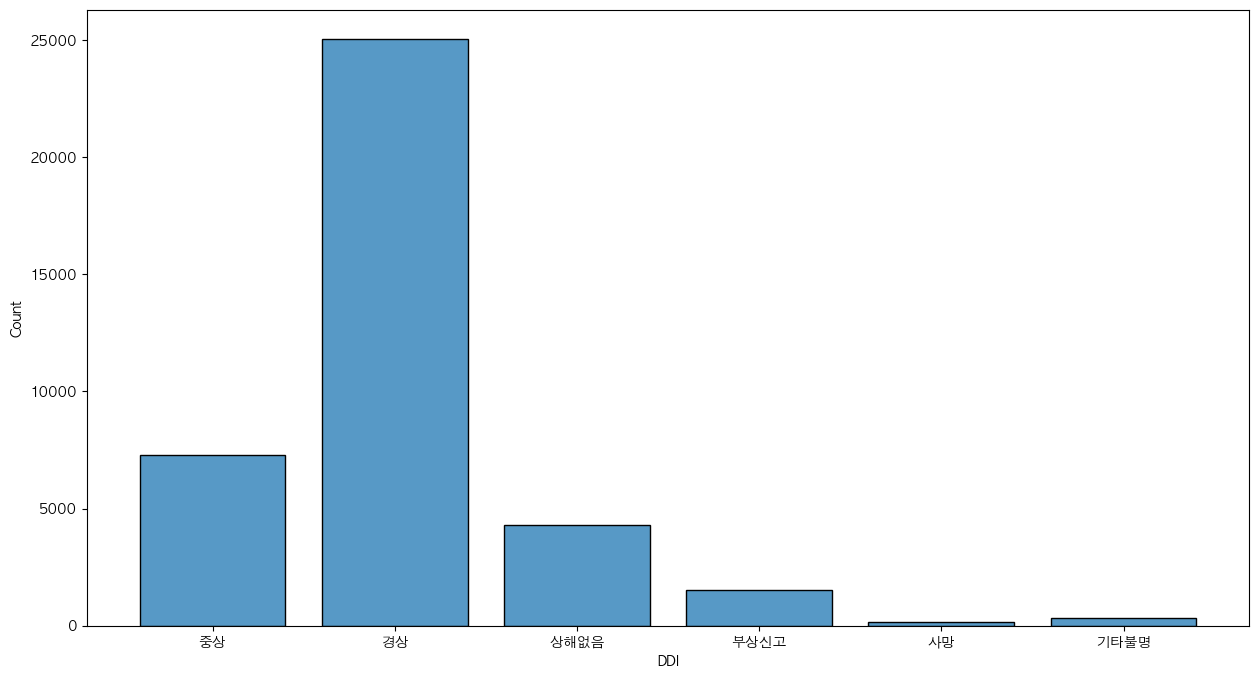

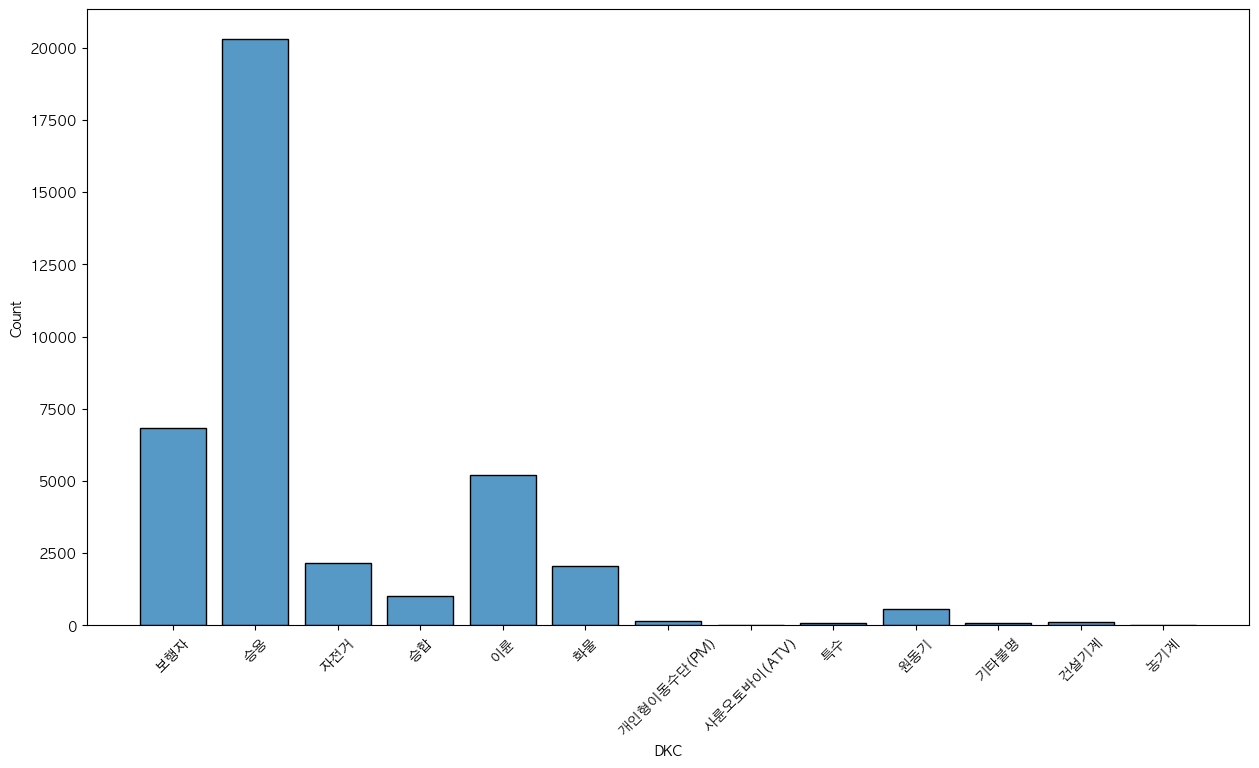

In [22]:
# 피해 운전자의 부상 정도의 Count
plt.figure(figsize=(15, 8))
sns.histplot(data=train_koc, x='DDI', multiple="dodge", shrink=.8)
plt.show()

# 피해 운전자의 차량 종류 Count
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
sns.histplot(data=train_koc, x='DKC', shrink=.8)
plt.show()

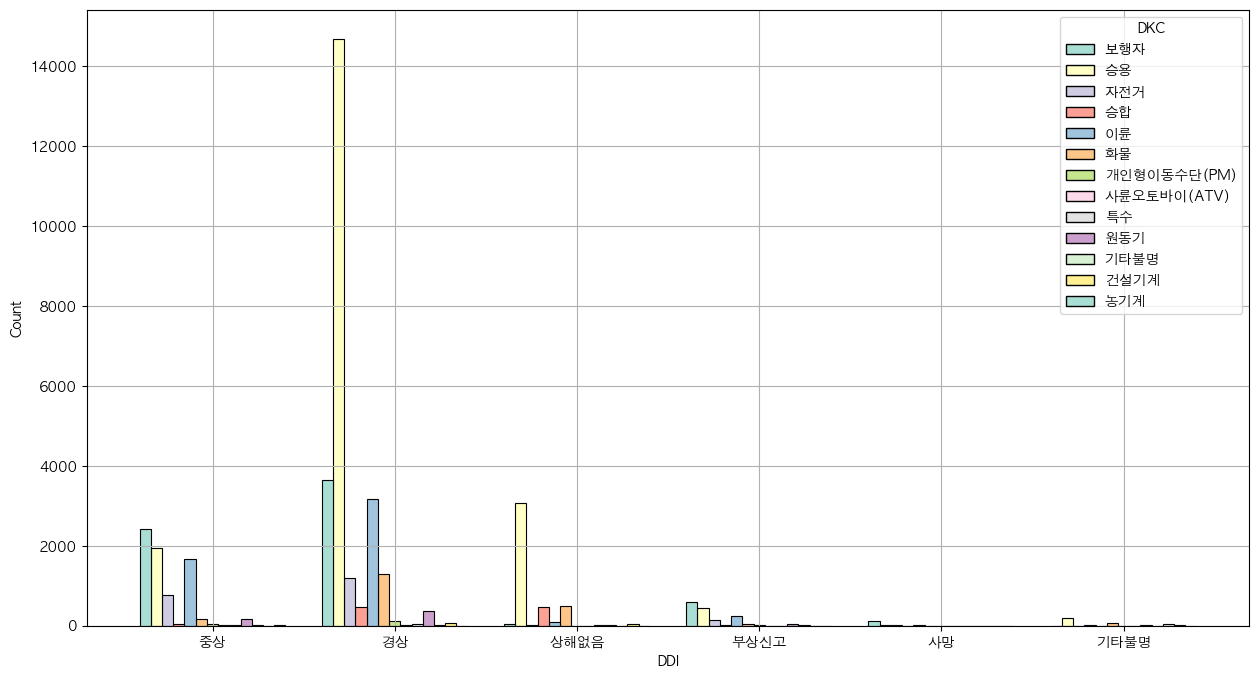

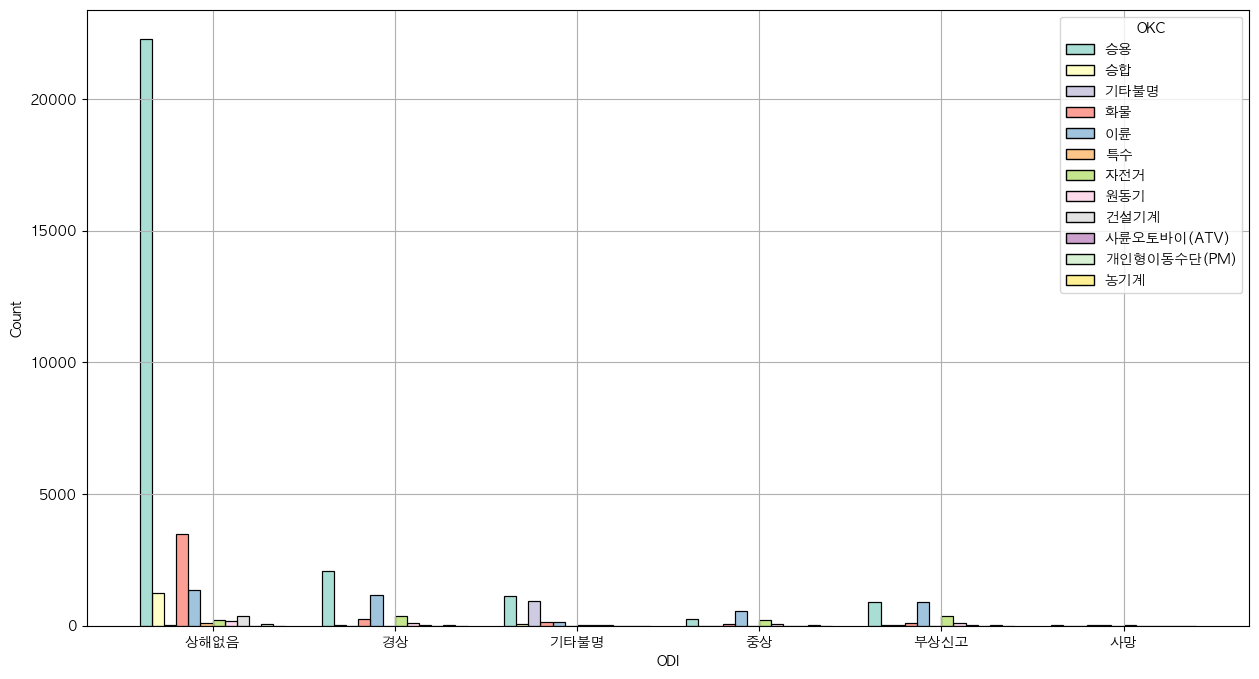

In [23]:
# 피해차량?의 종류에 따른 부상정도
# 피해차량이 승용차일 경우 중상, 경상이 많았다
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.histplot(data=train_koc, x='DDI', hue='DKC', multiple="dodge", shrink=.8, palette='Set3')
plt.show()

# 승용차량이 박았을 경우에 상해없음이 많았다?
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.histplot(data=train_koc, x='ODI', hue='OKC', multiple="dodge", shrink=.8, palette='Set3')
plt.show()

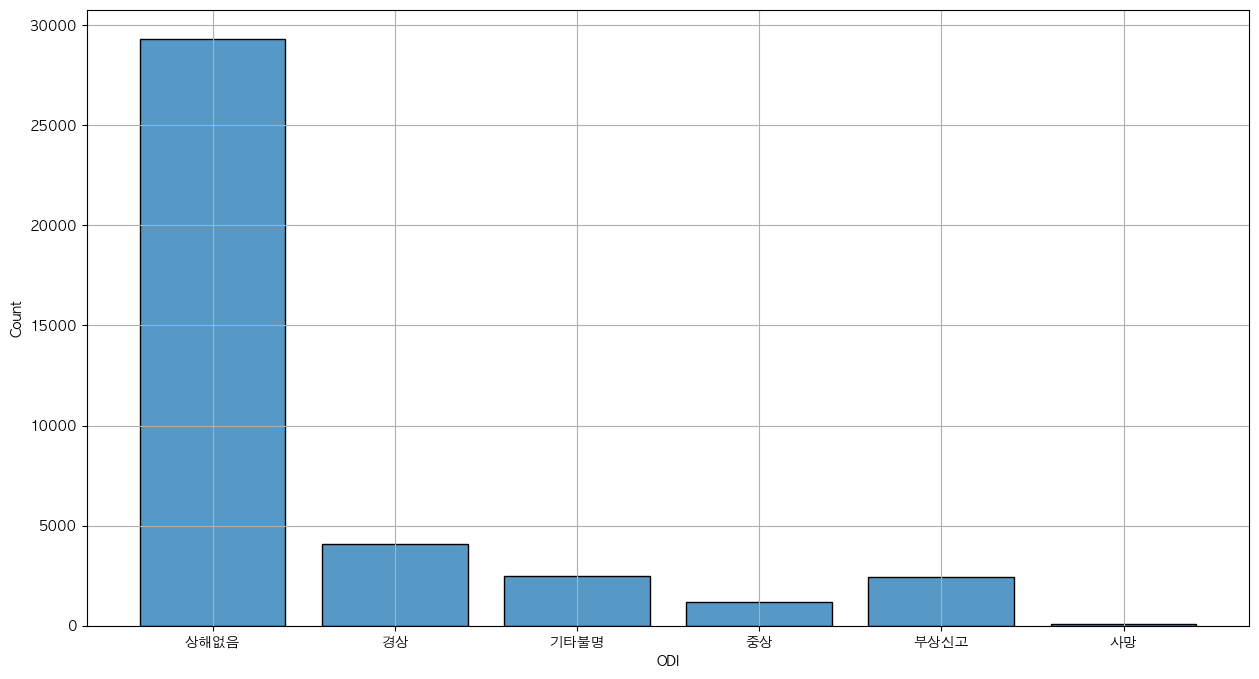

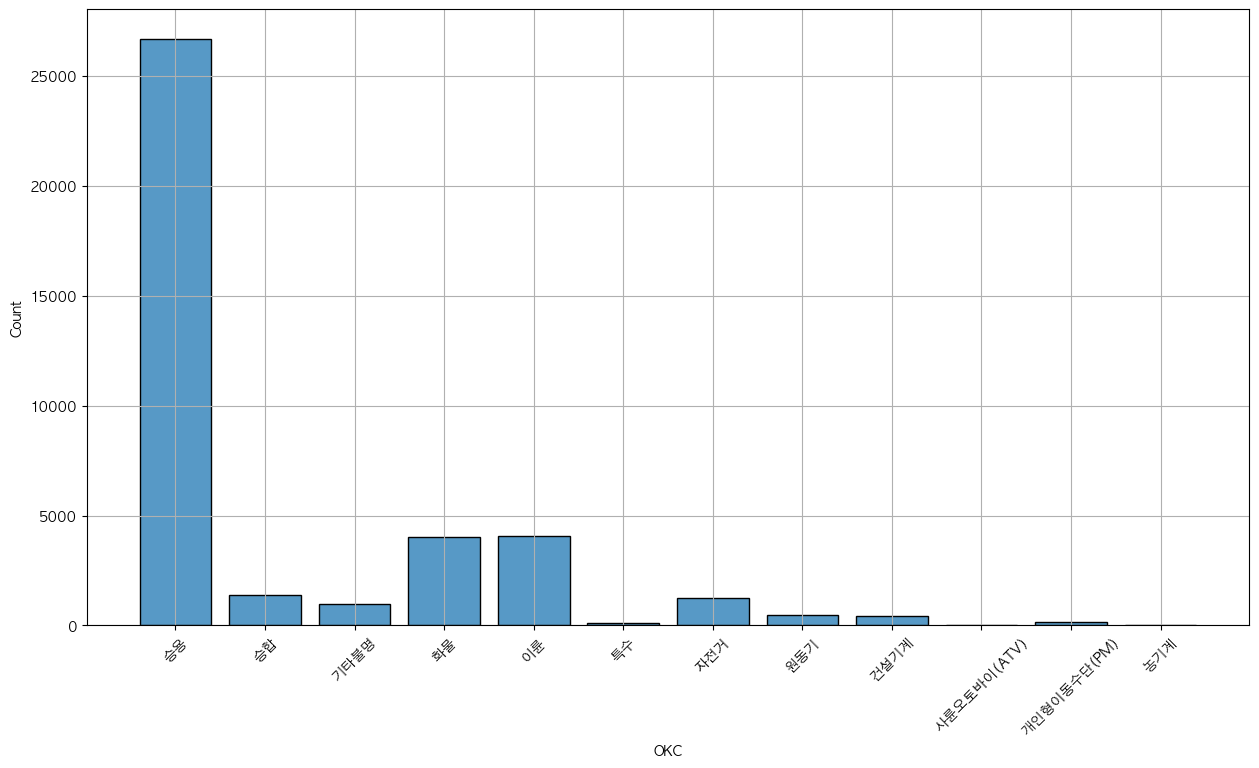

In [24]:
# 가해 운전자의 부상 정도의 Count
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.histplot(data=train_koc, x='ODI', multiple="dodge", shrink=.8)
plt.show()

# 가해 운전자의 차량 종류 Count
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
plt.grid(True)
sns.histplot(data=train_koc, x='OKC', multiple="dodge", shrink=.8)
plt.show()

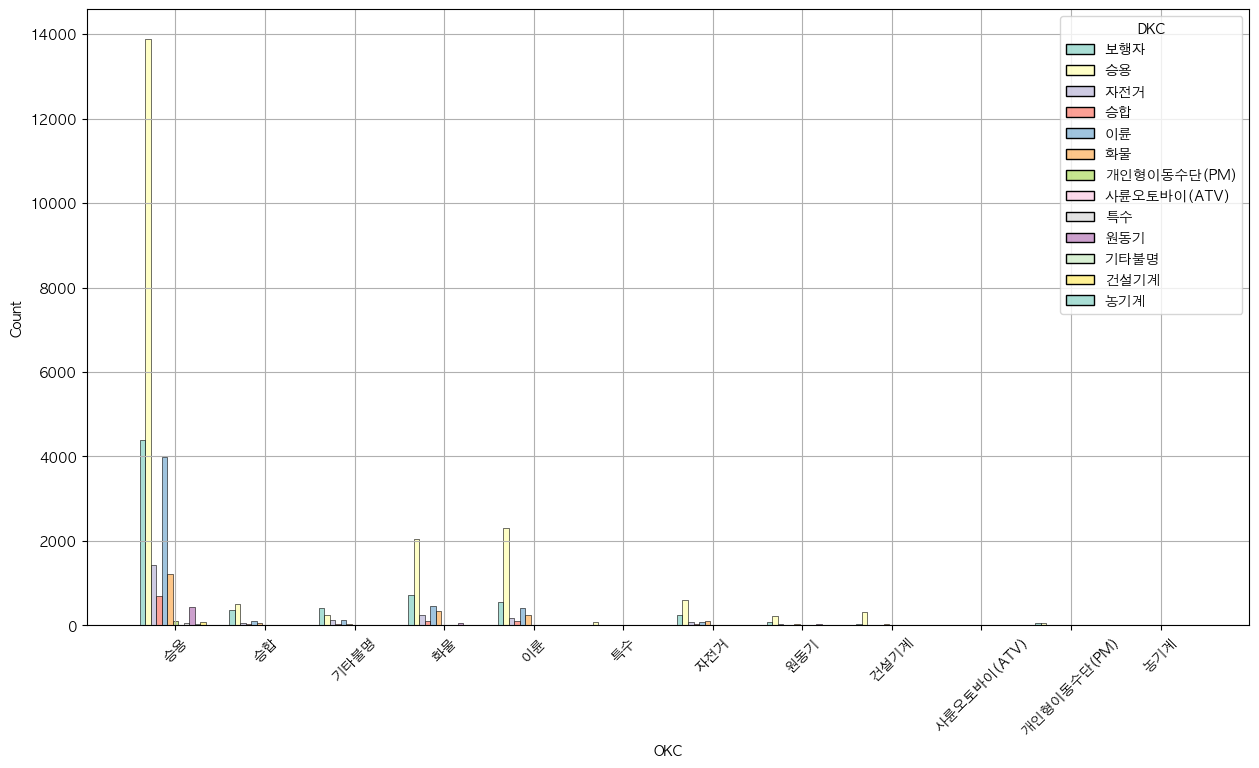

In [25]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=45)
plt.grid(True)
sns.histplot(data=train_koc, x="OKC", hue='DKC', multiple="dodge", shrink=.8, palette='Set3')
plt.show()

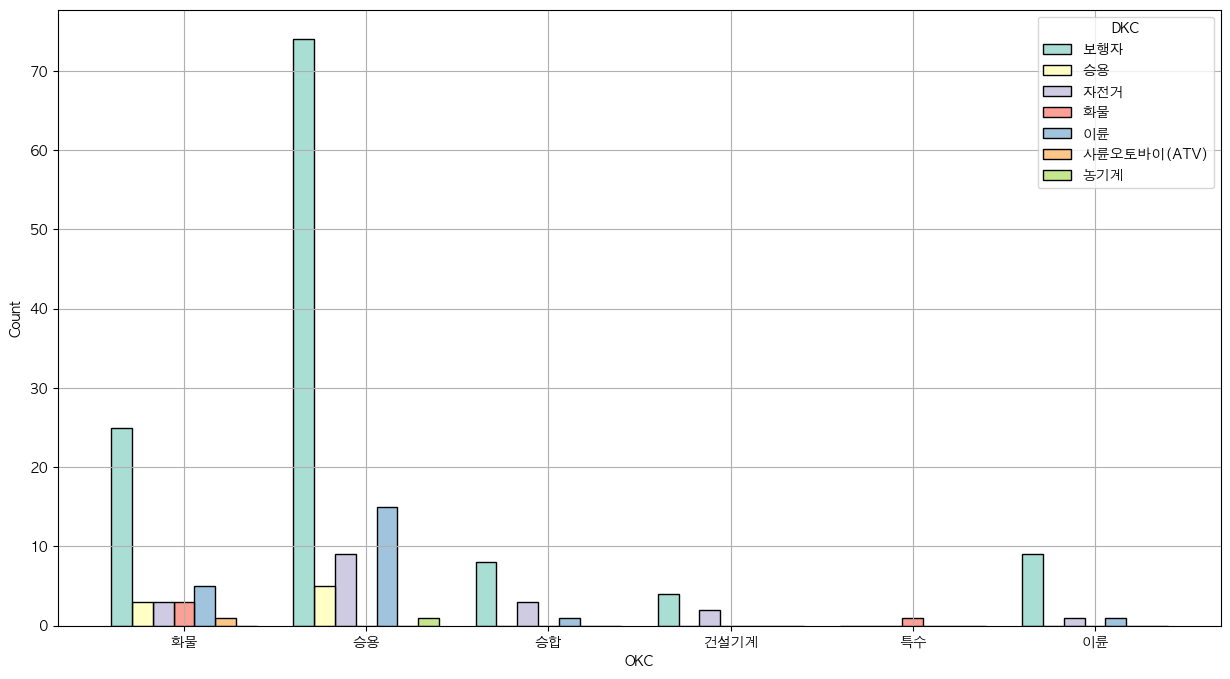

In [26]:
# 승용이랑 보행자랑 사고가 났을 경우 사망자 수가 높음, 그 다음으로 화물과 보행자, 그다음 이륜과 보행자순...
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.histplot(data=train_koc[train_koc["DDI"]=="사망"], x="OKC", hue='DKC', multiple="dodge", shrink=.8, palette='Set3')
plt.show()

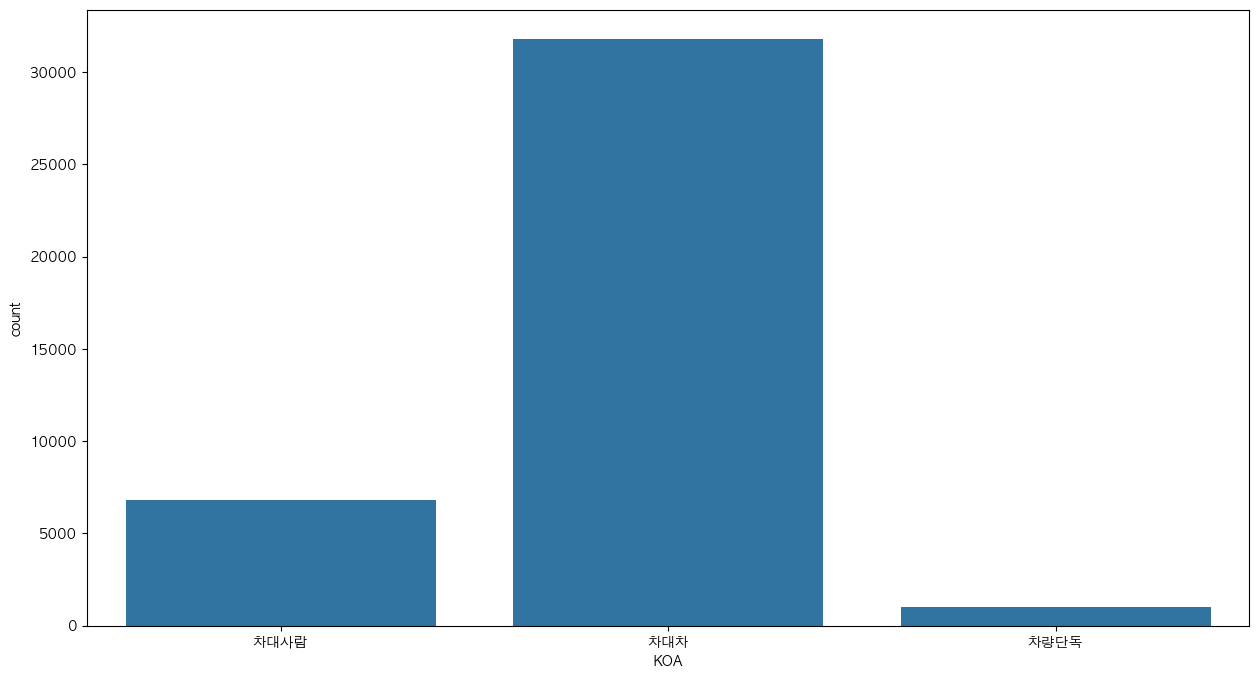

In [27]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train_koc, x="KOA")
plt.show()

In [28]:
train_koc[train_koc["KOA"] == "차량단독"] # 차량단독으로 사고가 났을 경우 가해자로 배정됨...

,ID,DKC,DDI,OKC,ODI,KOA,Death_num,SI_num,MI_num,ECLO
14,ACCIDENT_00014,NaN,NaN,승용,중상,차량단독,0,1,1,8
53,ACCIDENT_00053,NaN,NaN,승용,경상,차량단독,0,0,1,3
100,ACCIDENT_00100,NaN,NaN,승용,경상,차량단독,0,0,1,3
118,ACCIDENT_00118,NaN,NaN,승용,상해없음,차량단독,0,0,1,3
141,ACCIDENT_00141,NaN,NaN,화물,상해없음,차량단독,0,2,0,10
...,...,...,...,...,...,...,...,...,...,...
39436,ACCIDENT_39436,NaN,NaN,승용,부상신고,차량단독,0,0,0,1
39437,ACCIDENT_39437,NaN,NaN,개인형이동수단(PM),경상,차량단독,0,0,1,3
39497,ACCIDENT_39497,NaN,NaN,승합,상해없음,차량단독,0,0,1,3
39508,ACCIDENT_39508,NaN,NaN,승용,부상신고,차량단독,0,0,0,1


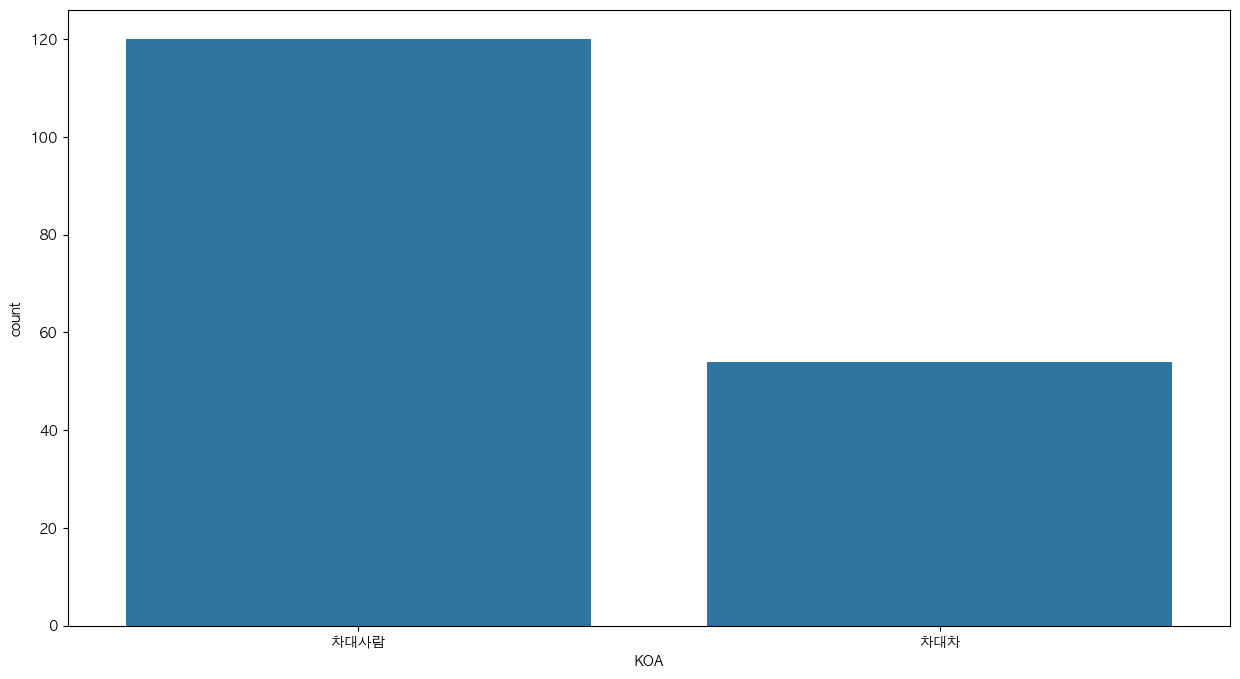

In [29]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train_koc[train_koc["DDI"]=="사망"], x="KOA")
plt.show()

# 가설 3 사망자 수는 차대차 보다는 **"차대사람"** 일 때 더 많을 것이다. O => 차대사람이 더 많다. 특이한건 차량단독 사고가 많이 없어서 그런지 차량단독사고에서 사망자는 없었다.

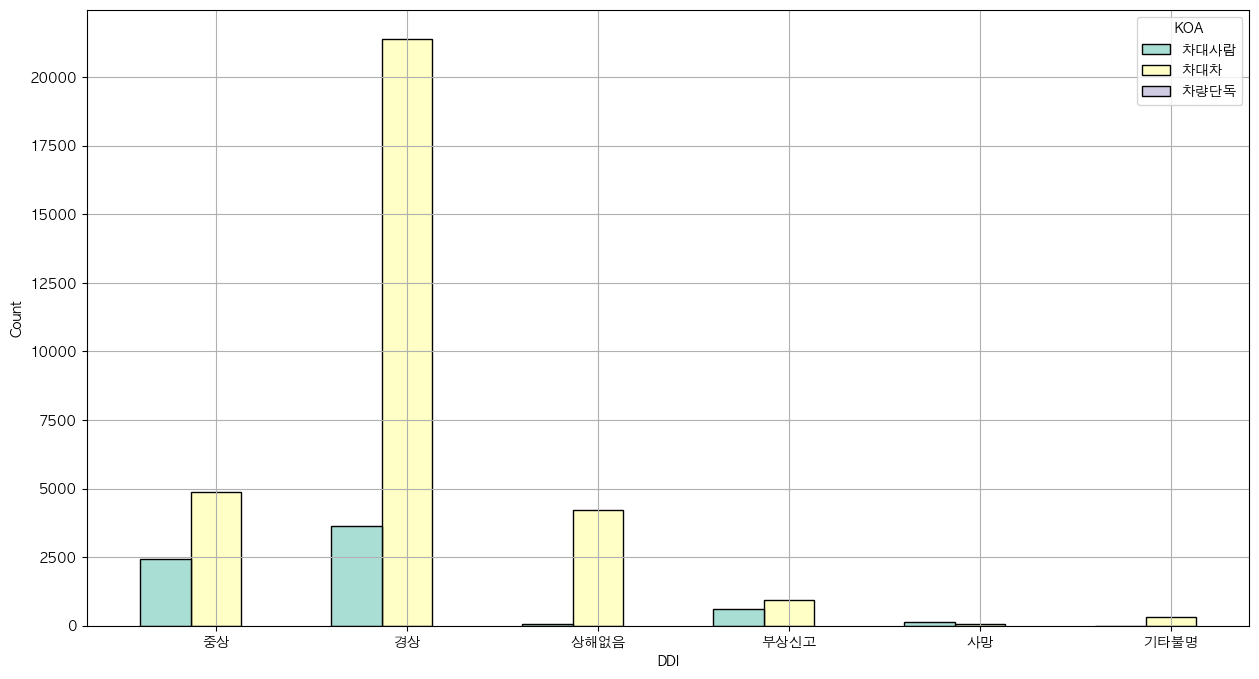

In [30]:
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.histplot(data=train_koc, x="DDI", hue='KOA', multiple="dodge", shrink=.8, palette='Set3')
plt.show()

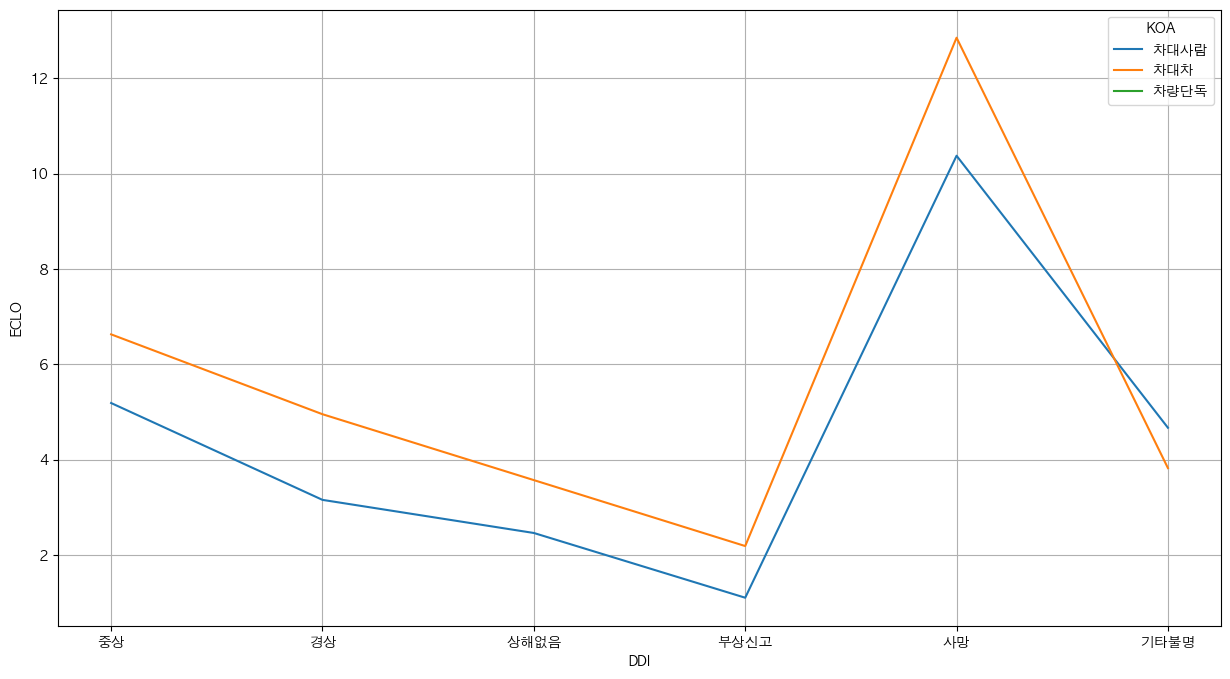

In [31]:
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.lineplot(data=train_koc, x="DDI", y="ECLO", hue='KOA', errorbar=None)
plt.show()

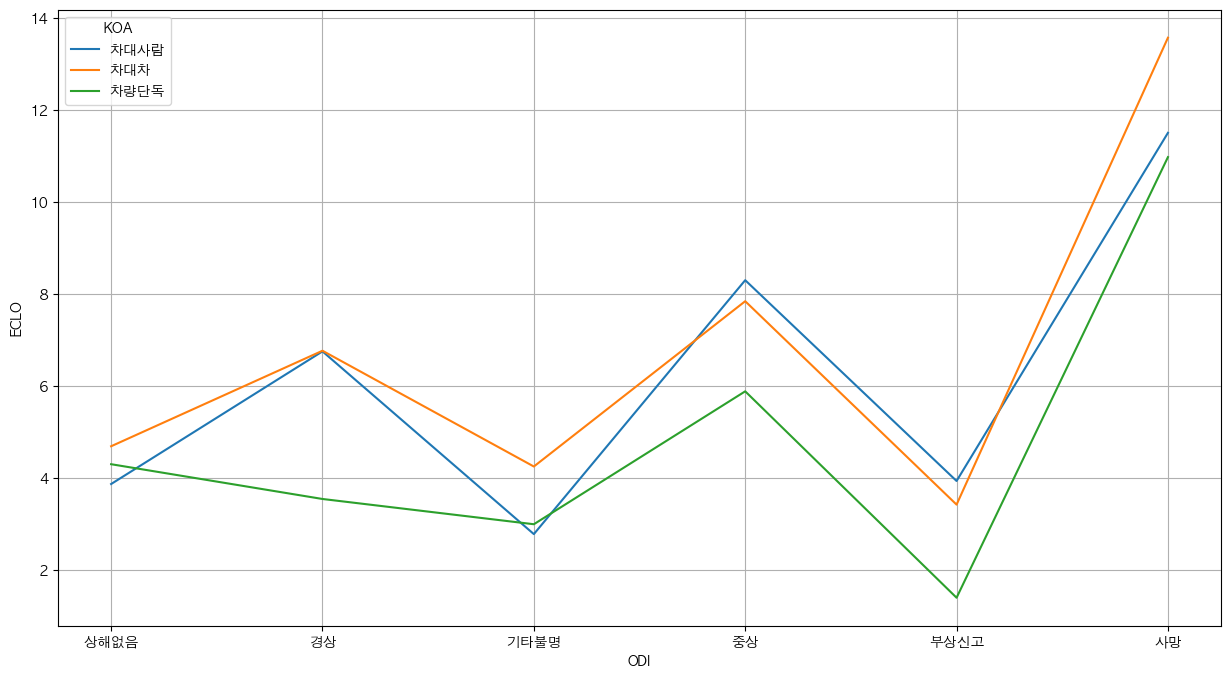

In [32]:
plt.figure(figsize=(15, 8))
plt.grid(True)
sns.lineplot(data=train_koc, x="ODI", y="ECLO", hue='KOA', errorbar=None)
plt.show()

<Axes: xlabel='도로형태', ylabel='ECLO'>

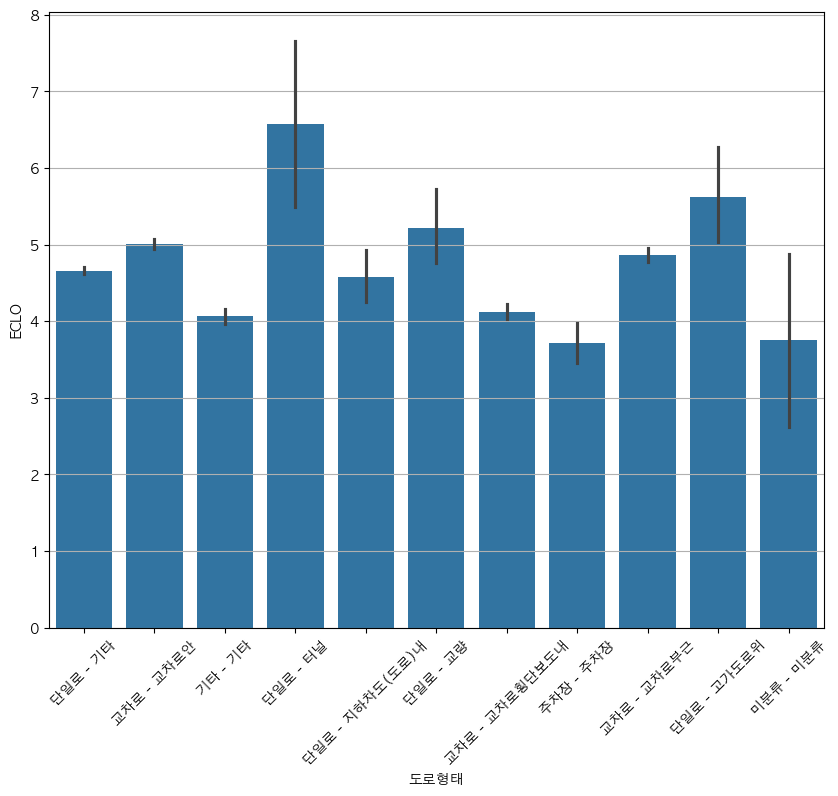

In [33]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
plt.grid(True)
sns.barplot(data=train_data, x="도로형태", y="ECLO")

<Axes: xlabel='KOA', ylabel='ECLO'>

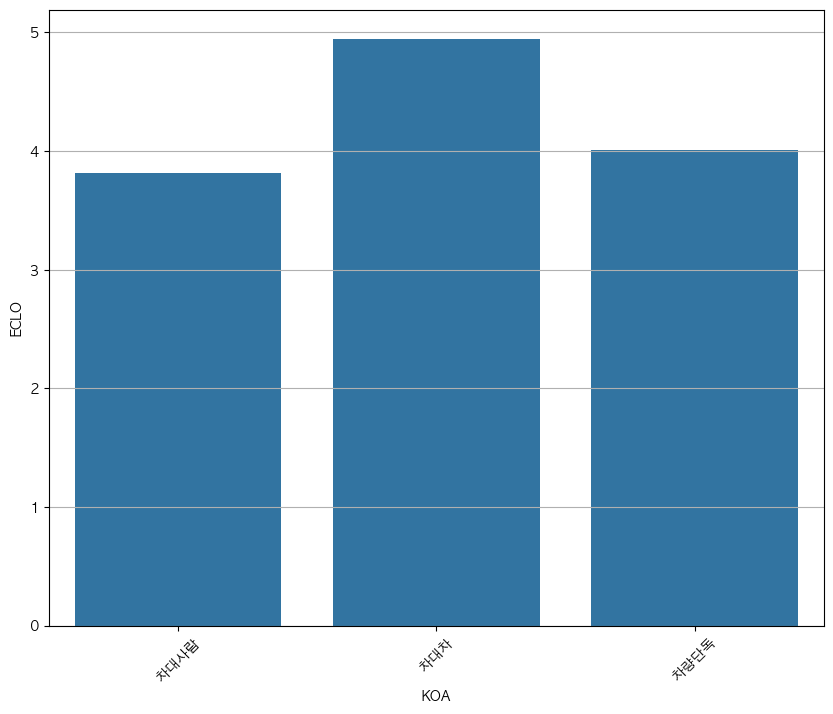

In [34]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
plt.grid(True)
sns.barplot(data=train_koc, x="KOA", y="ECLO", errorbar=None)

<Axes: xlabel='도로형태', ylabel='ECLO'>

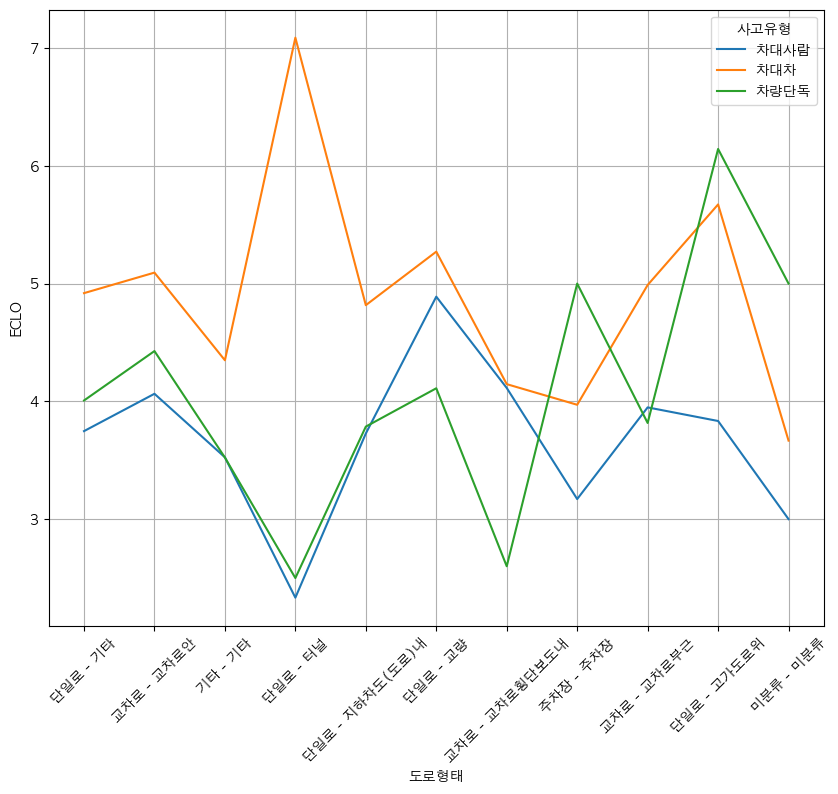

In [35]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
plt.grid(True)
sns.lineplot(data=train_data, x="도로형태", y="ECLO", hue="사고유형", errorbar=None)

3.8176496414459242 4.944596507786692 4.006054490413724


<Axes: >

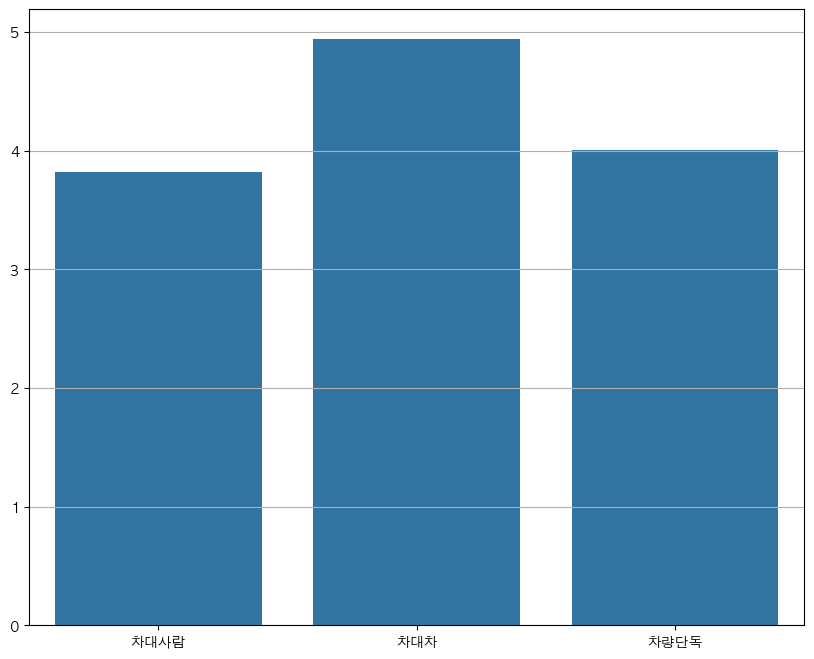

In [36]:
car_by_people = train_data[train_data["사고유형"]=="차대사람"].ECLO.mean()
car_by_car = train_data[train_data["사고유형"]=="차대차"].ECLO.mean()
only_car = train_data[train_data["사고유형"]=="차량단독"].ECLO.mean()

print(car_by_people, car_by_car, only_car)

plt.figure(figsize=(10, 8))
plt.grid(True)
sns.barplot(x = ["차대사람", "차대차", "차량단독"], y=[car_by_people, car_by_car, only_car])